In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

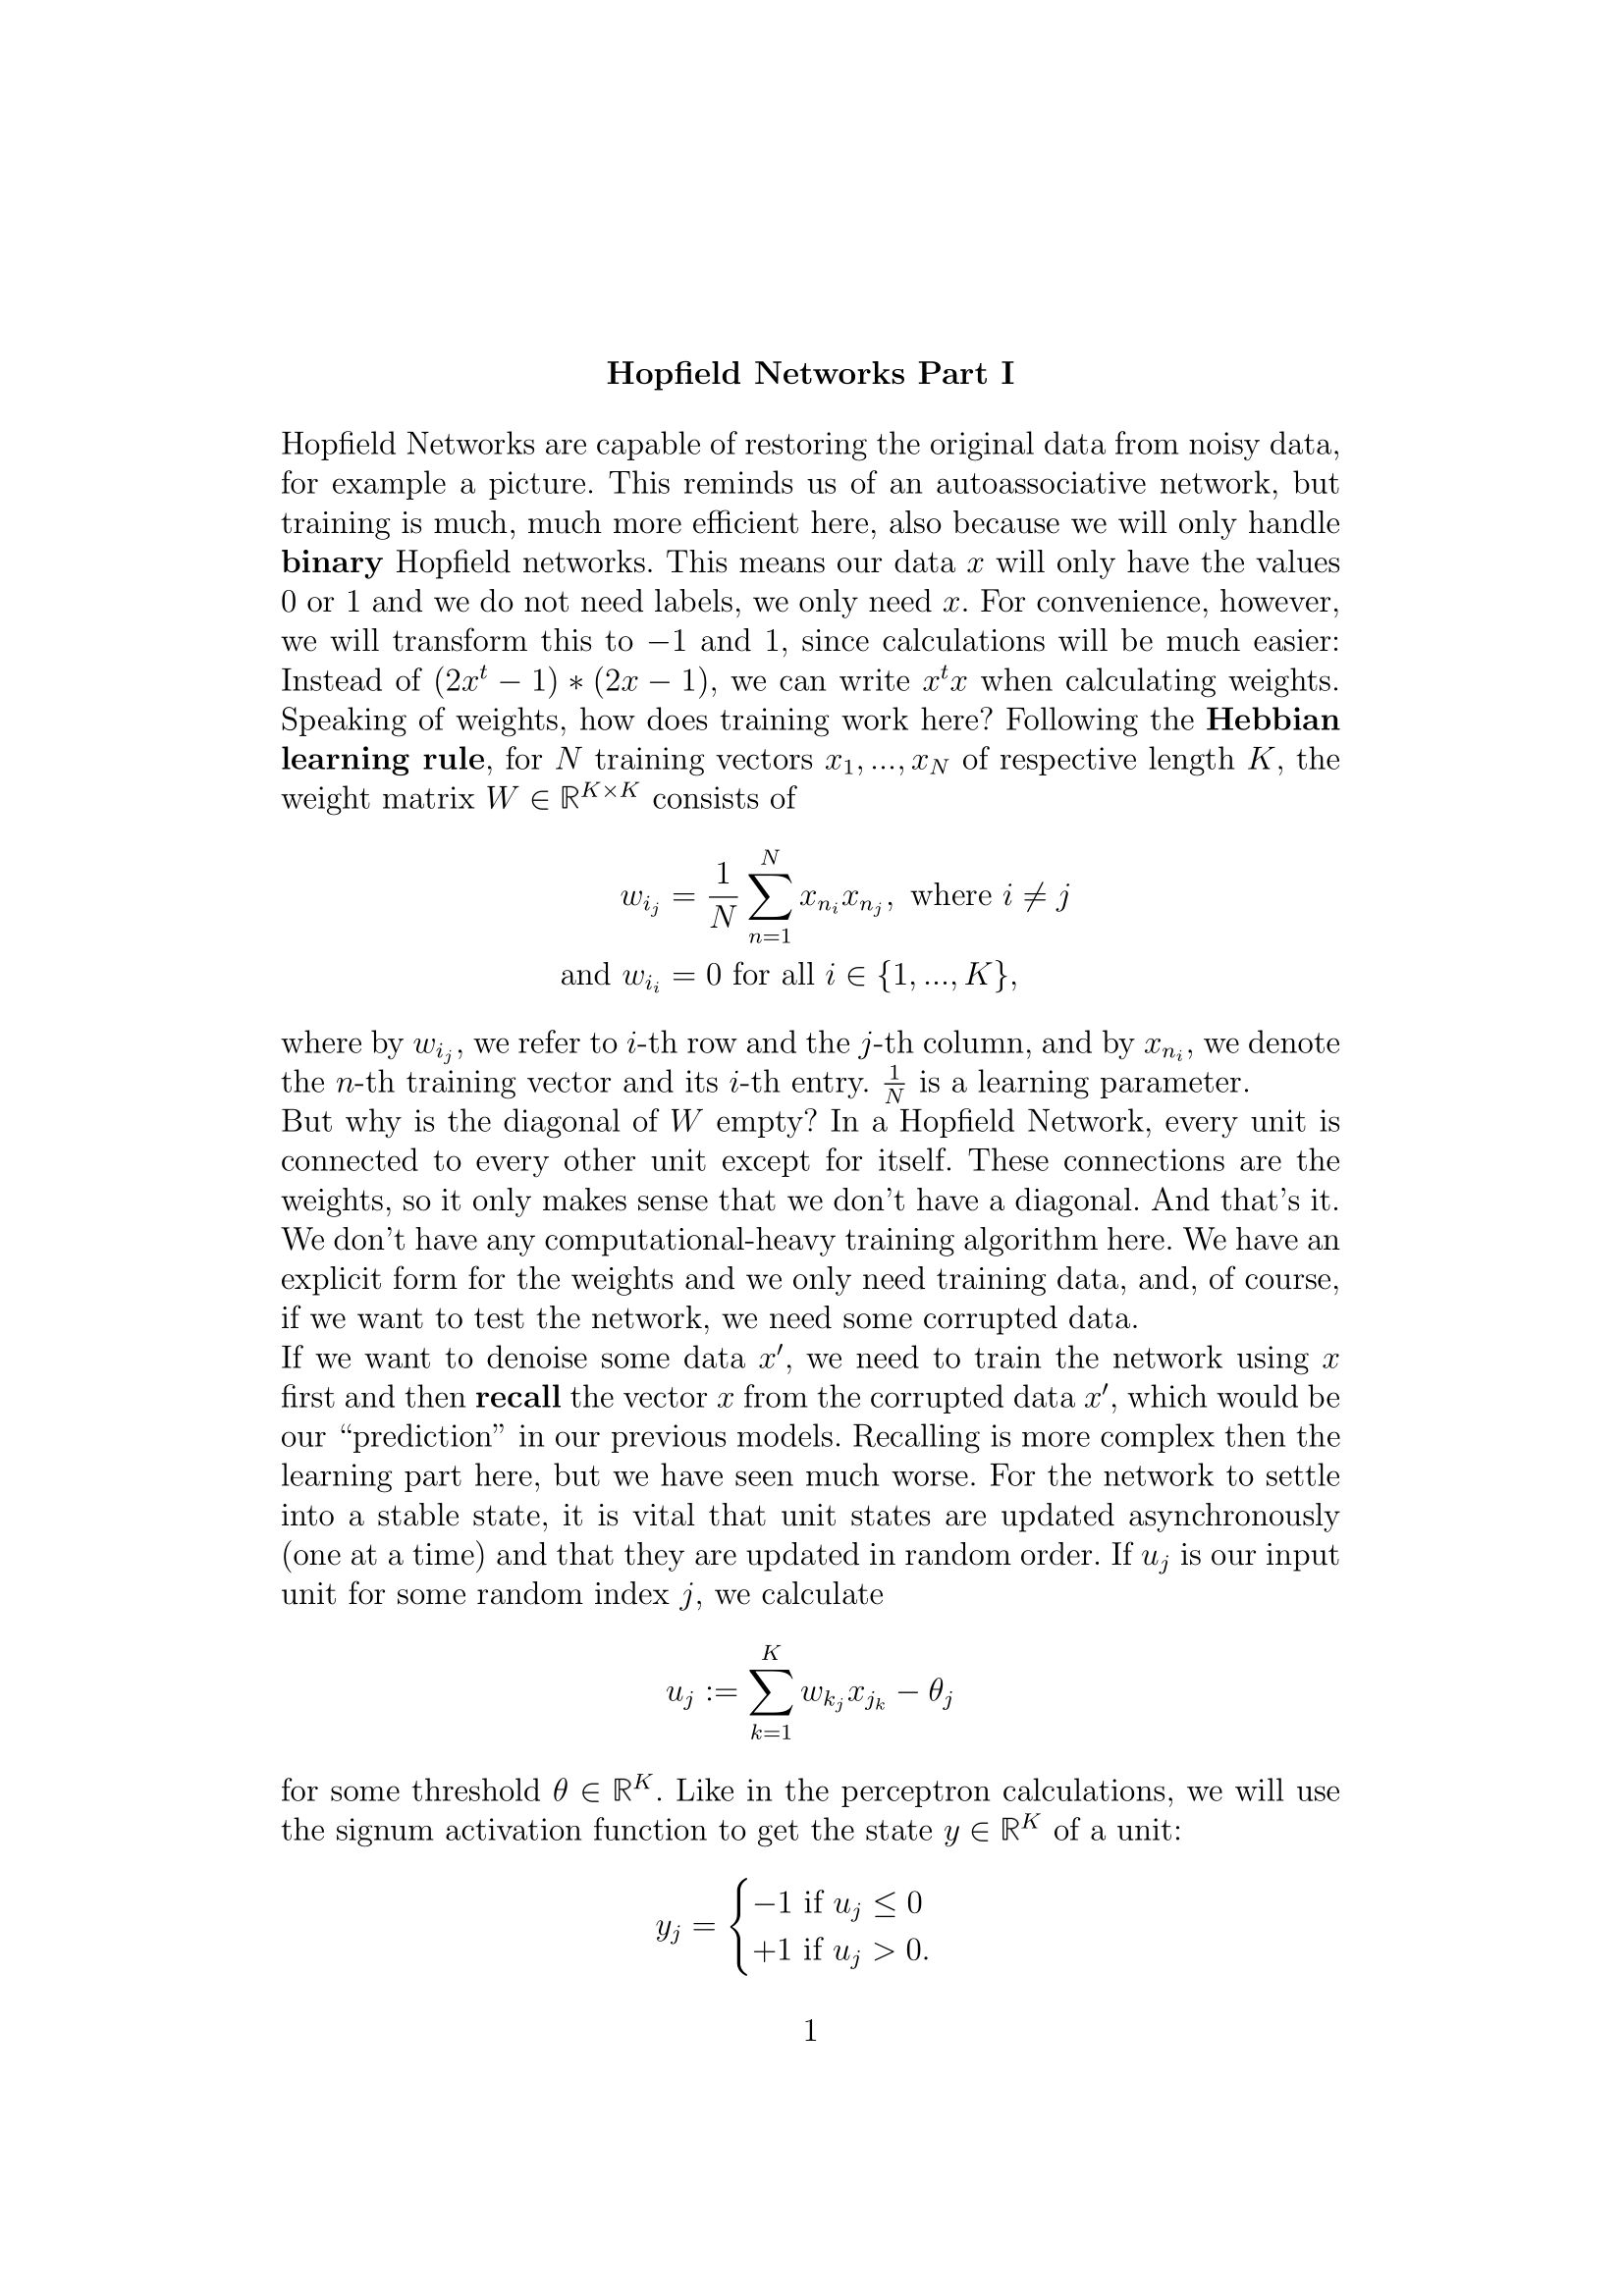

In [2]:
# Alright, it's time again for some math!
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'Math explanations\\Chapter 6.1 - Hopfield Networks Learning one Pattern-1.png')
display(img_PIL)

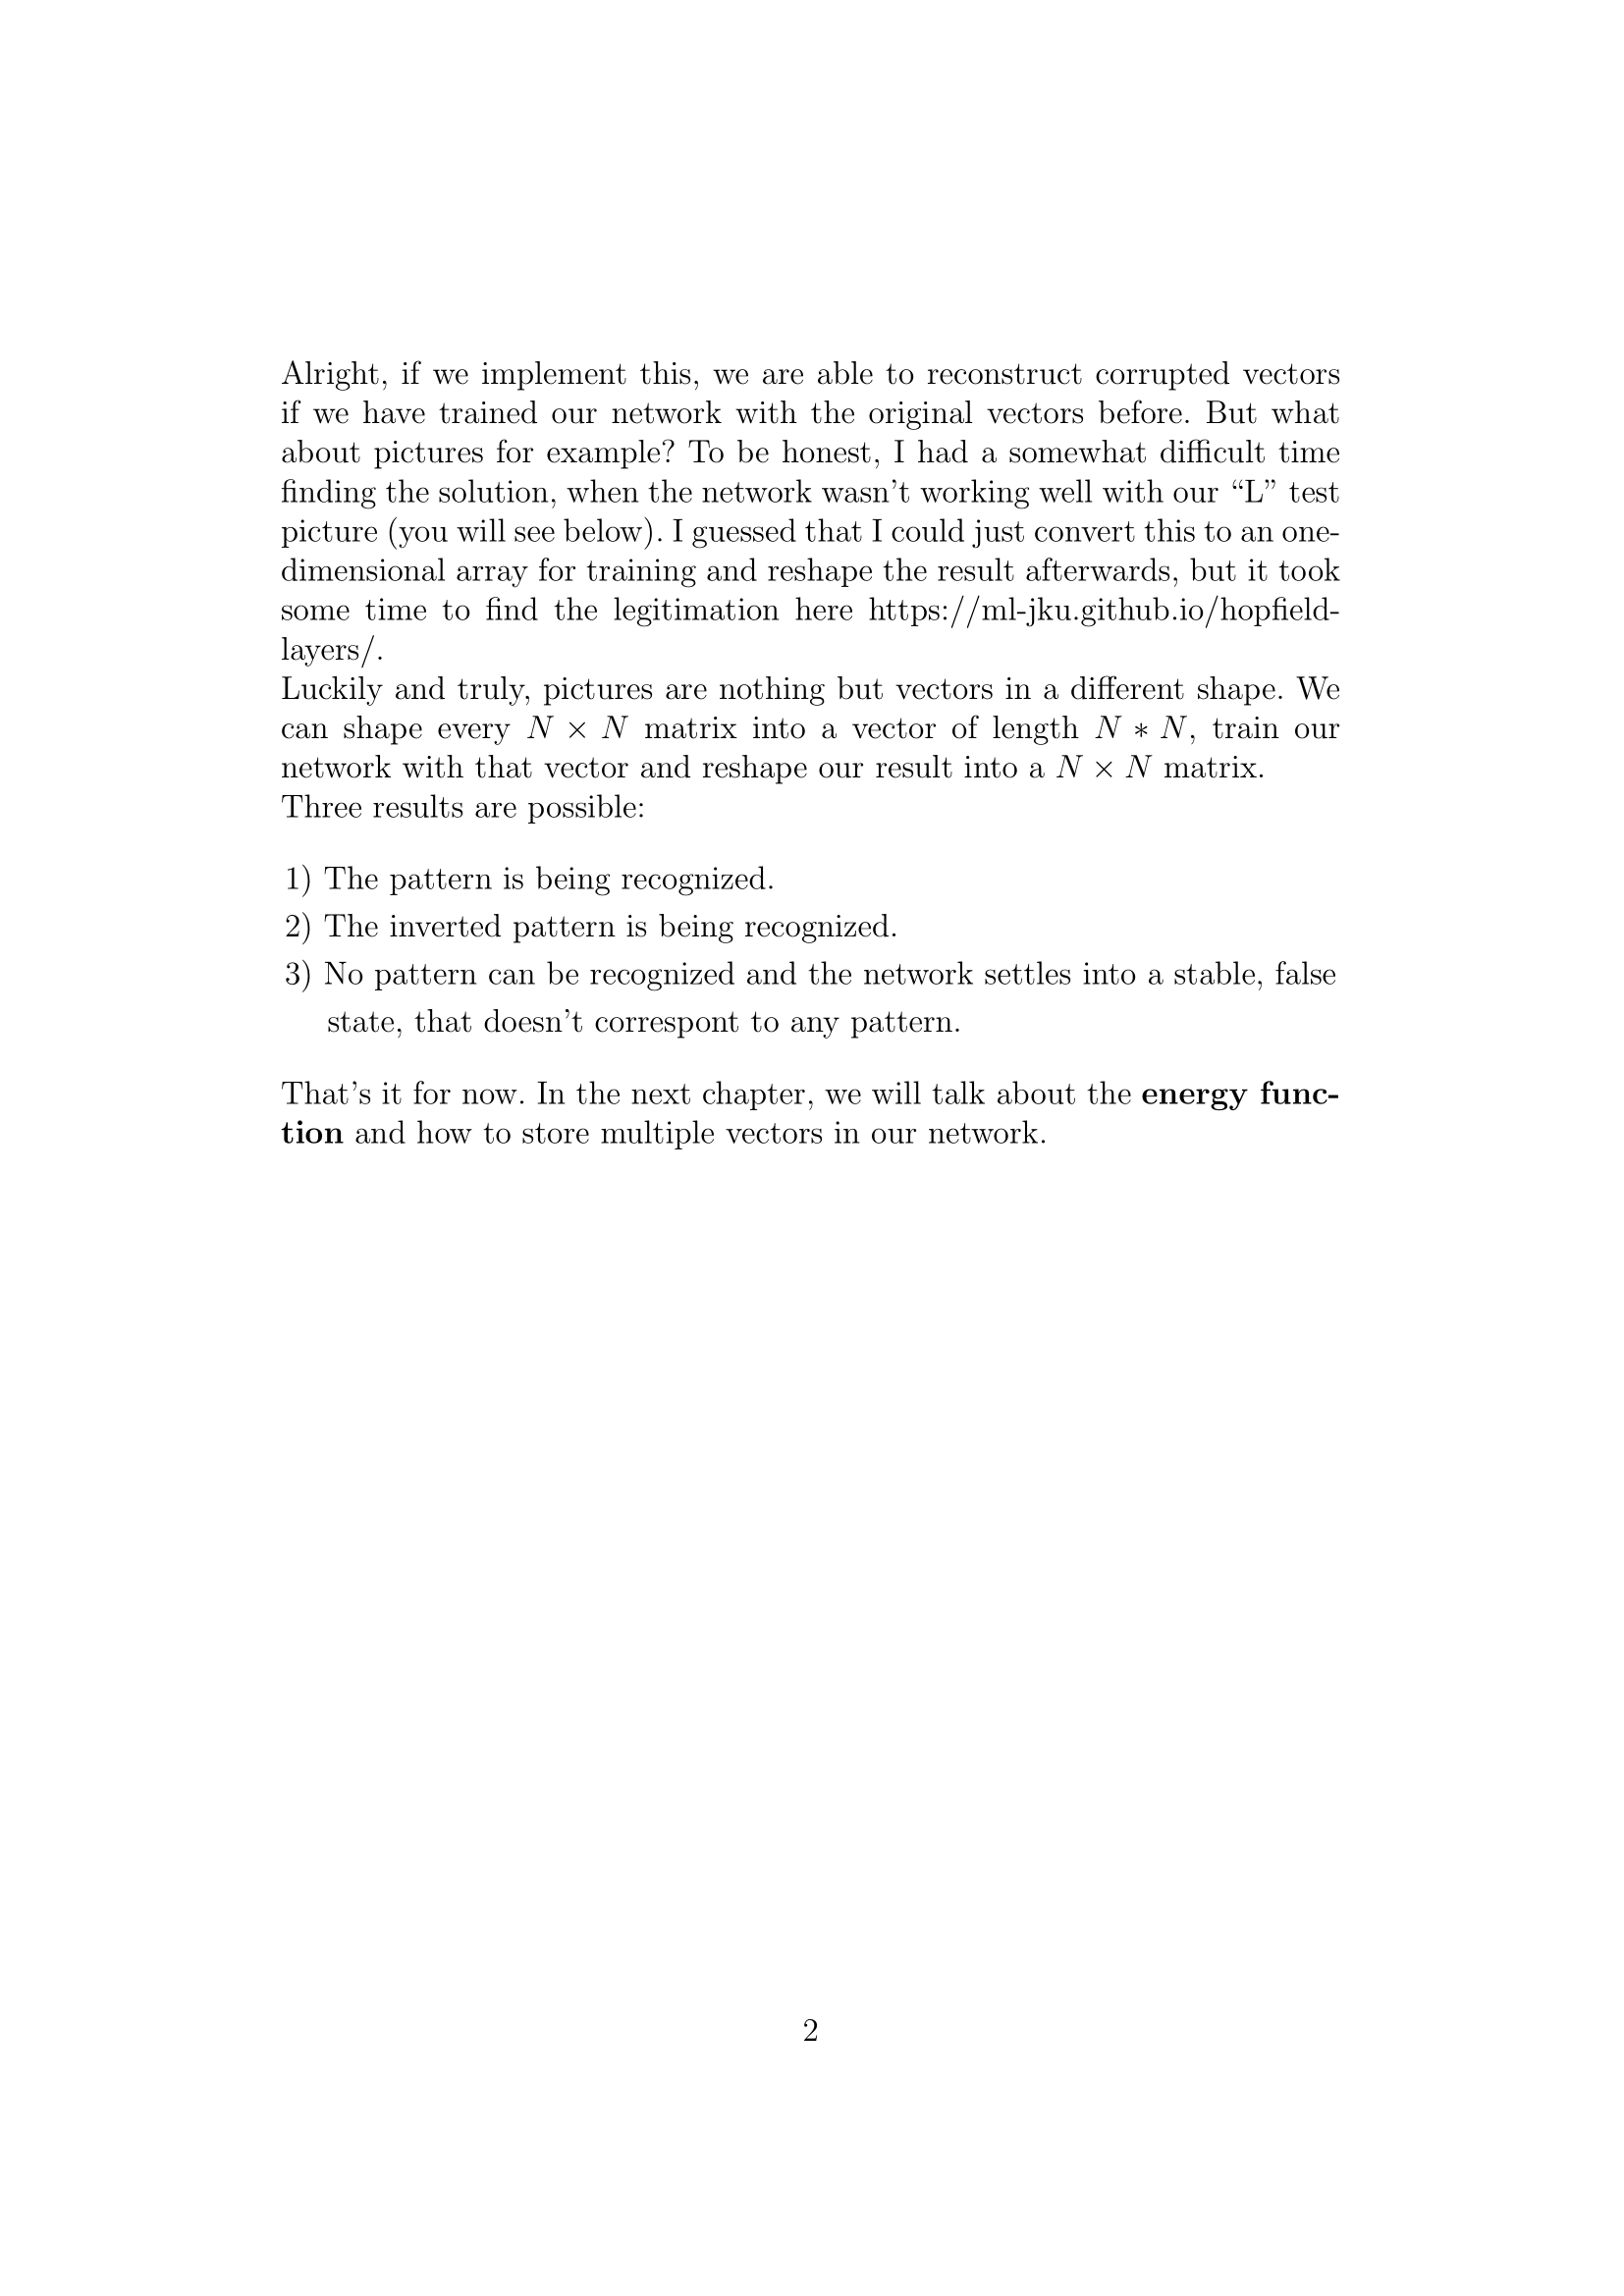

In [3]:
# Alright, it's time again for some math!
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'Math explanations\\Chapter 6.1 - Hopfield Networks Learning one Pattern-2.png')
display(img_PIL)

In [4]:
class Hopfield:

    def train(y): 
            # Hebbian learning rule
        x = y.copy().reshape(-1,1) # Copy y so that we don't change the input
        Weights = x.T * x  * 1/x.shape[1] ## (L x L) matrix 
        np.fill_diagonal(Weights, 0) # Because there is no connection from a unit to itself, we write zeros into the diagonal. If the diagonal isn't 
                                     # empty, we won't necessarily arrive at a stable state.
        Hopfield.weights = Weights
        

    def recall(y, threshold = 0):
            # Save the shapes so that we can restore the original shape later on
        L_row = y.shape[0]
        L_col = y.shape[1]
            # Retrieve a column vector from the matrix picture
        y_reshaped = y.copy().reshape(-1, 1) # Copy y so that we don't change the input
        L = len(y_reshaped)
            # Because threshold could be a vector of different values, we make the default threshold a vector so that we can adress the entries later on 
        if threshold == 0:
            threshold = np.zeros(L)

        stable = False
        while stable == False:
            stable = True
                # Choose a random order 
            random_list = np.random.choice(np.arange(L), size = L, replace = False)
                # Copy y_reshaped in order to compare it to the updated version later on
            temp = y_reshaped.copy()
                # Updating the states asynchronously requires doing this in a loop (as far as I know at least)
            for r in random_list:
                y_reshaped[r] = np.sign( Hopfield.weights[r, :].T @ y_reshaped - threshold[r] )
                if y_reshaped[r] != temp[r]:
                    stable = False

         # Give our result the original shape
        y_reshaped = y_reshaped.reshape(L_row, L_col) 
        
        return y_reshaped

In [5]:
# Example for a correctly reproduced vector from itself
Hopfield.train(np.array([[1, -1, 1, 1, 1, -1]]))
Hopfield.recall(np.array([[1, -1, 1, 1, 1, -1]]), 0)

array([[ 1, -1,  1,  1,  1, -1]])

In [6]:
# Example for a correctly reproduced vector from a corrupted one
Hopfield.train(np.array([[1, -1, 1, 1, 1, -1]]))
Hopfield.recall(np.array([[-1, -1, -1, 1, 1, -1]]), 0)

array([[ 1, -1,  1,  1,  1, -1]])

In [7]:
# Example 2 for the reproduced vector from a corrupted one
X = np.array([[1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1]])
Y = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1]])
Hopfield.train(X)
(Hopfield.recall(Y, 0) - X)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [8]:
# Example for the "inverted" reproduced vector
Hopfield.train(np.array([[1, -1, 1, 1, 1, -1]]))
Hopfield.recall(np.array([[-1, -1, -1, -1, -1, -1]]), 0)

array([[-1,  1, -1, -1, -1,  1]])

Let's test our network on a shape. 

Text(0.5, 1.0, 'Reconstructed from noisy picture')

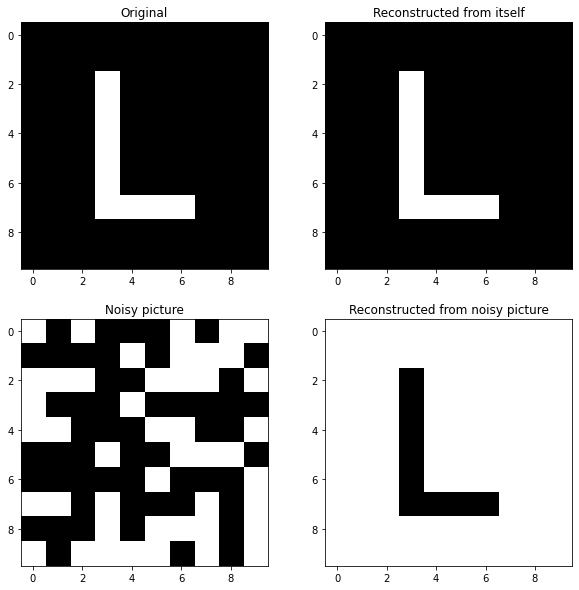

In [9]:
L = np.array([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

L[L == 0] = -1

plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(L, cmap = 'gray')
plt.title("Original")

plt.subplot(2, 2, 2)
Hopfield.train(L)
LL = Hopfield.recall(L, 0)
plt.imshow(LL, cmap = 'gray')
plt.title("Reconstructed from itself")

r1, r2 = np.random.randint(0, 10, size = 70), np.random.randint(0, 10, size = 70)
L_noisy = L.copy()
L_noisy[r1, r2] = -L_noisy[r1, r2]
plt.subplot(2, 2, 3)
plt.imshow(L_noisy, cmap = 'gray')
plt.title("Noisy picture")

LL = Hopfield.recall(L_noisy, 0)
plt.subplot(2, 2, 4)
plt.imshow(LL, cmap = 'gray')
plt.title("Reconstructed from noisy picture")

We see that our reproduction is the inverted picture, because we added so much noise. Now, let's get to the hard test. As visualizations will be very hard to distinguish between, we will verify our result differently. 

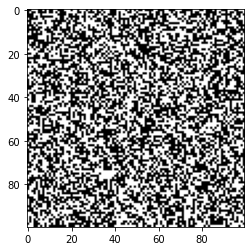

In [10]:
L = np.random.randint(0, 2, size = 10000).reshape(100,100)
L[L == 0] = -1
plt.imshow(L, cmap = 'gray')

In [11]:
Hopfield.train(L)
LL = Hopfield.recall(L, 0)
if not (L - LL).any(): print("Everything is recalled totally correctly! :)")

Everything is recalled totally correctly! :)


In [12]:
r1, r2 = np.random.randint(0, 100, size = 5000), np.random.randint(0, 100, size = 5000)
    # Because we take the sample with replacing, we won't expect 5000 changes in our picture
L_noisy = L.copy()
    # Add the noise to the picture
L_noisy[r1, r2] = -L_noisy[r1, r2]
print( ((L - L_noisy) != 0).sum(), "/ 10000 values are different now.")
LL = Hopfield.recall(L, 0)
    # (L - LL).any() returns True if any value is not 0. Therefore, not (L - LL).any() returns True, if every no value is not 0, so if every value is 0
if not (L - LL).any(): print("Everything is recalled totally correctly! :)")

3955 / 10000 values are different now.
Everything is recalled totally correctly! :)


It seems that everything is working just fine. In the next chapter we will explore the energy function and how we can train our network with multiple pictures.  